### SMDM - 2.Students Survey - Project 2

by:- Madhu Narayanan


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_color_codes('deep')
import copy
import os

In [2]:
#os.chdir

### Problem 2

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).


Lets first download the dataset and understand the shape and size.

In [3]:
df_sur = pd.read_csv('Survey-1.csv')

In [4]:
df_sur.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [5]:
df_sur.tail()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50
61,62,Female,23,Senior,Economics/Finance,No,3.2,Part-Time,70.0,2,3,250,Laptop,0


In [6]:
df_sur.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [7]:
ss = df_sur.copy()

In [8]:
ss.drop('ID',axis=1,inplace=True) # Dropped ID as the index marks the same 
ss.tail()

,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
57,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50
61,Female,23,Senior,Economics/Finance,No,3.2,Part-Time,70.0,2,3,250,Laptop,0


In [9]:
ss.shape

(62, 13)

No null values in the dataset. Let's get started with some Exploratory Data Analysis

In [10]:
df_sur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


#### Description  of Variables:

1. ID - is a Nominal roll number - (Numerical but used as Nominal)     
2. Gender - Categorical data representing Gender - (Categorical)
3. Age - Age of the student - (Numerical)
4. Class - The class to which students belong to - (Categorical)
5. Major - The subject/Major graduated by the student - (Categorical)
6. Grad Intention - The intention of the Graduate - (Categorical-Continuous)
7. GPA - The grade marks scored by the student - (Numerical - decimal)
8. Employment - The employment status of the student whether he is Full time/Part-time/Not employed - (Categorical-Continuous)
9. Salary - The Salary of the student who is working either Full-time/ Part-time - (Numerical - Continuous)
10. Social Networking - Presence of Students in no: Social Networking platforms - (Numerical)
11. Satisfaction - Scale of satisfaction levels - (Numerical)
12. Spending - The spending of Students - (Numerical - Continuous)
13. Computer - The tytpe of Computing device used by student - (Categorical)
14. Text Messages - The no: of text messages used by student - (Numerical - Continuous)

There are 62 records and 14 Attributes in the original dataset of df_sur:

Nominal - 1 (Numerical) (This will be removed from copy dataset ss as it is a repetion of index.

Categorical - 6.

Numerical - 7.


Based on the Problem Statement and initial loading of datset, lets get into Exploratory Data Analyses
Using methods of descriptive statistics to summarize data:

Female    33
Male      29
Name: Gender, dtype: int64


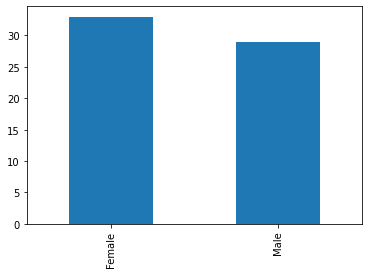

In [11]:
print(ss.Gender.value_counts())
ss['Gender'].value_counts().plot(kind='bar');

Senior       31
Junior       25
Sophomore     6
Name: Class, dtype: int64


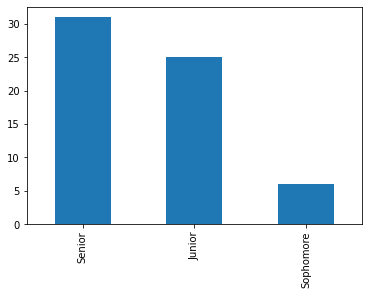

In [12]:
print(ss.Class.value_counts())
ss['Class'].value_counts().plot(kind='bar');

Retailing/Marketing       14
Economics/Finance         11
Management                10
Accounting                 7
Other                      7
International Business     6
CIS                        4
Undecided                  3
Name: Major, dtype: int64


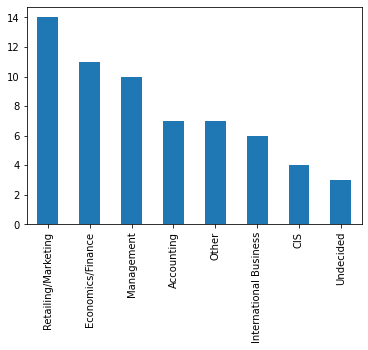

In [13]:
print(ss.Major.value_counts())
ss['Major'].value_counts().plot(kind='bar');

Yes          28
Undecided    22
No           12
Name: Grad Intention, dtype: int64


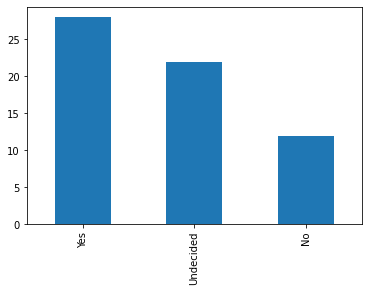

In [14]:
print(ss['Grad Intention'].value_counts())
ss['Grad Intention'].value_counts().plot(kind='bar');

Part-Time     43
Full-Time     10
Unemployed     9
Name: Employment, dtype: int64


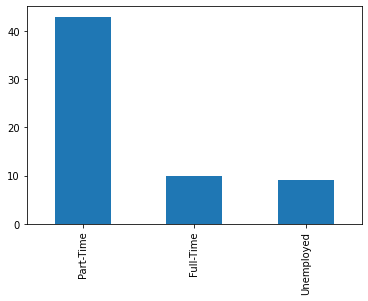

In [15]:
print(ss['Employment'].value_counts())
ss['Employment'].value_counts().plot(kind='bar');

Laptop     55
Desktop     5
Tablet      2
Name: Computer, dtype: int64


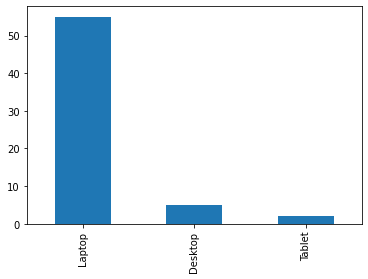

In [16]:
print(ss['Computer'].value_counts())
ss['Computer'].value_counts().plot(kind='bar');

In [17]:
ss.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62.0,NaN,NaN,NaN,21.129032,1.431311,18.0,20.0,21.0,22.0,26.0
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62.0,NaN,NaN,NaN,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62.0,NaN,NaN,NaN,48.548387,12.080912,25.0,40.0,50.0,55.0,80.0
Social Networking,62.0,NaN,NaN,NaN,1.516129,0.844305,0.0,1.0,1.0,2.0,4.0
Satisfaction,62.0,NaN,NaN,NaN,3.741935,1.213793,1.0,3.0,4.0,4.0,6.0


Now we have got the five-point summary, Let's get the same in graph mode (boxplot).

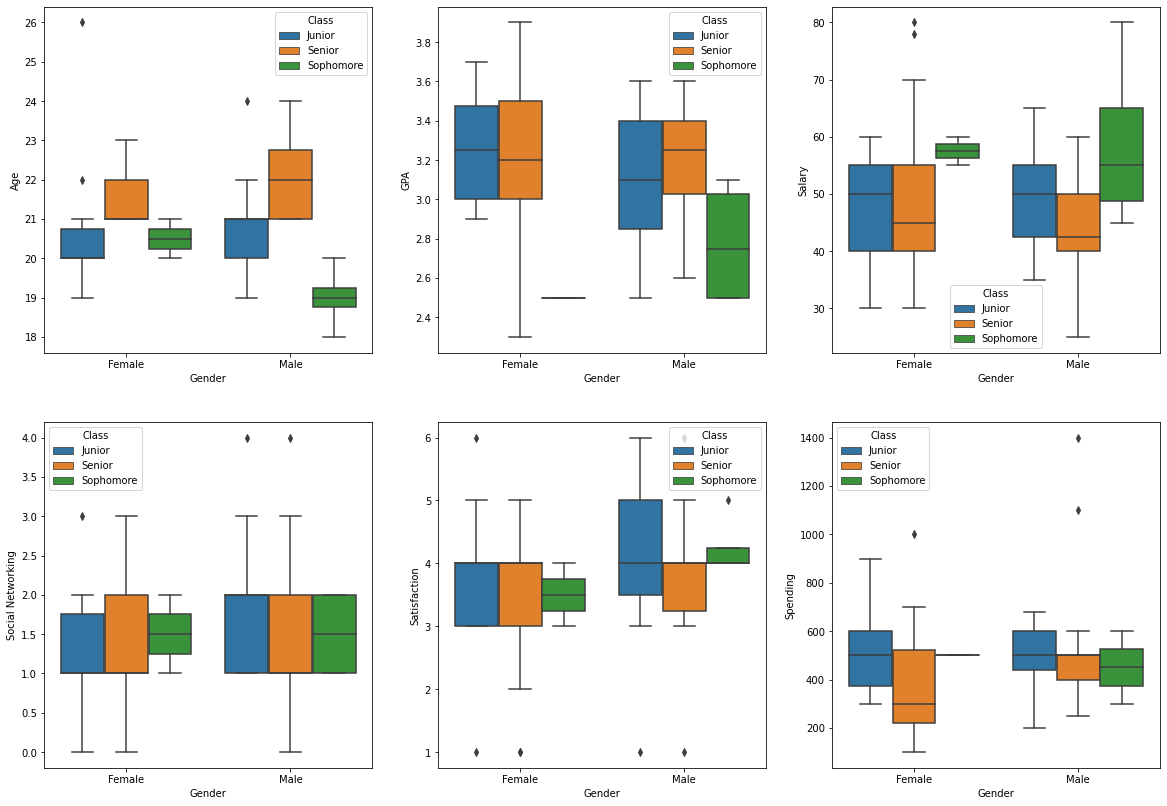

In [18]:
fig, axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(20,14)

a = sns.boxplot(data=ss,x='Gender',y='Age',hue='Class',orient = "v" , ax=axes[0][0])

b = sns.boxplot(data=ss,x='Gender', y='GPA',hue='Class',orient = "v" , ax=axes[0][1])

c = sns.boxplot(data=ss,x='Gender',y='Salary',hue='Class',orient = "v" , ax=axes[0][2])

d = sns.boxplot(data=ss,x='Gender',y='Social Networking',hue='Class',orient = "v" , ax=axes[1][0])

e = sns.boxplot(data=ss,x='Gender',y='Satisfaction',hue='Class',orient = "v" , ax=axes[1][1])

f = sns.boxplot(data=ss,x='Gender',y='Spending',hue='Class',orient = "v" , ax=axes[1][2])




From the graph we see hardly any outliers. However as exceptions, there are no outliers in Gender-GPA, Gender-Salary(Male). These outliers can be excluded and treated separately as they are meagre in count.

Let's try to understand if there any correlation or relation between series using Paiplot.

<Figure size 1080x1080 with 0 Axes>

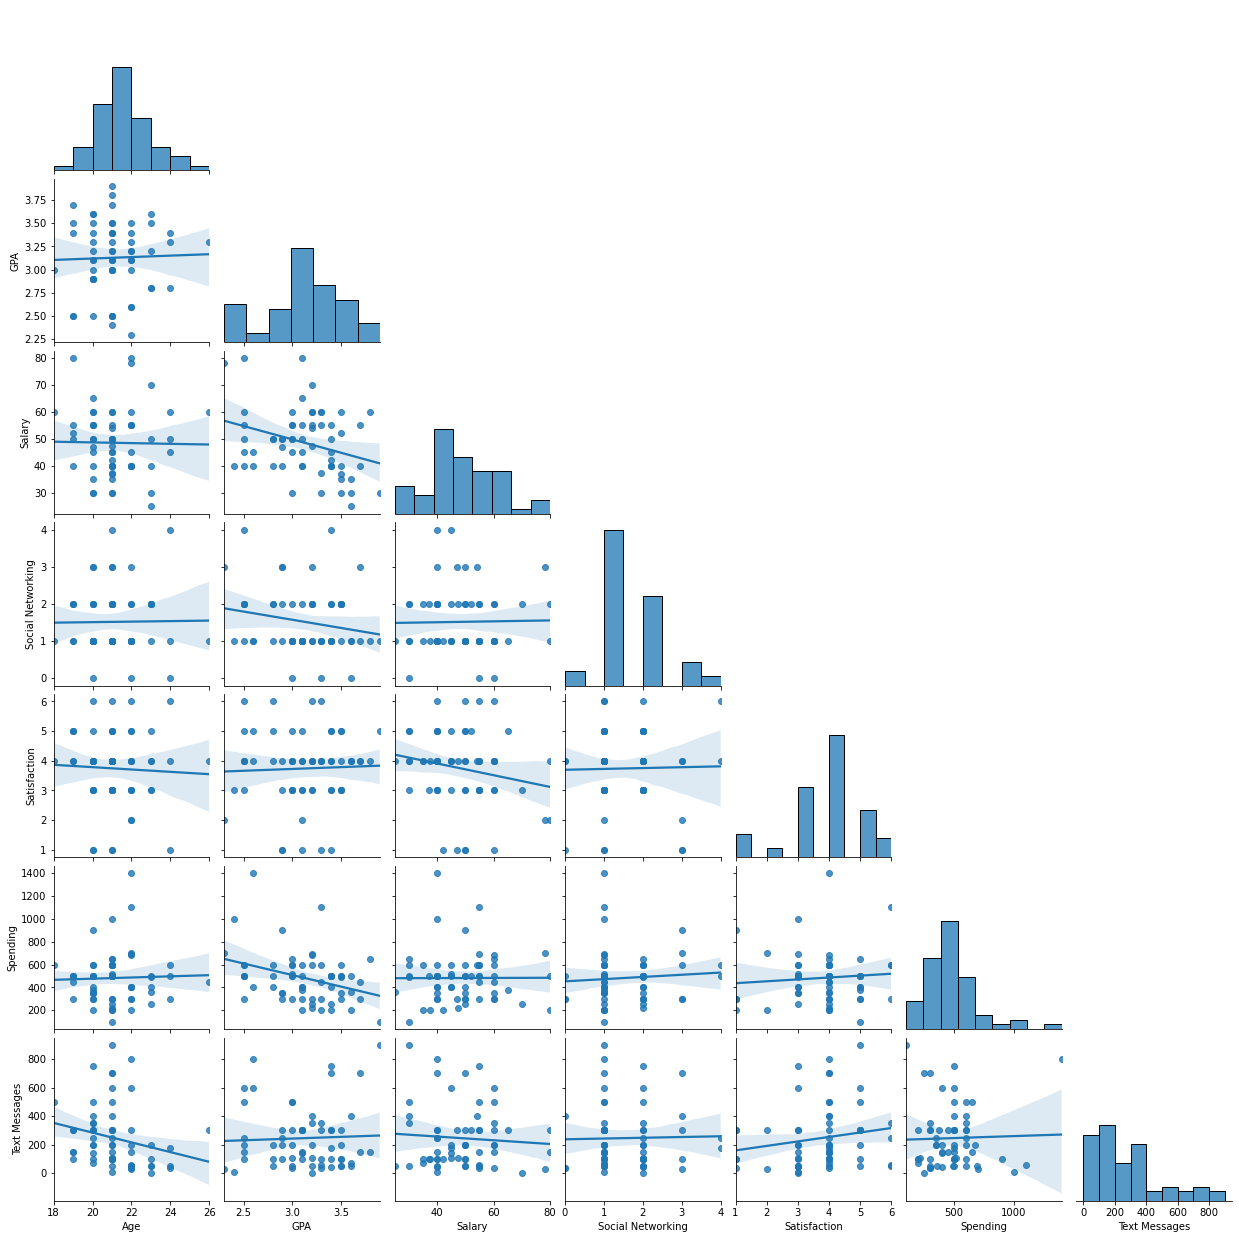

In [19]:
plt.figure(figsize=(15,15))
sns.pairplot(ss, corner=True, kind='reg');

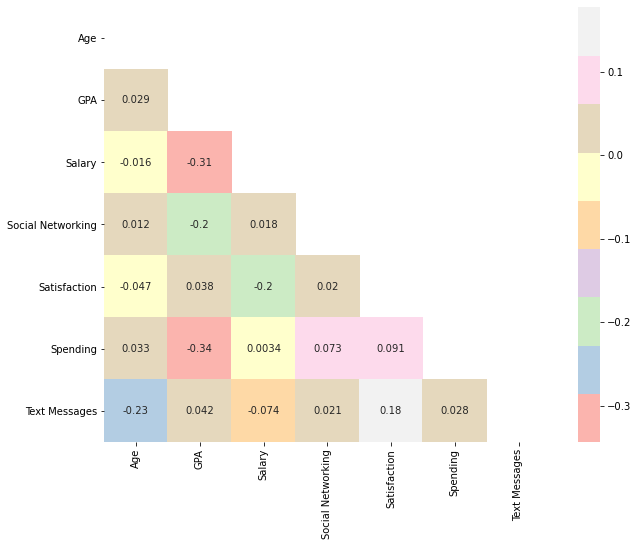

In [20]:
corr = ss.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, mask=mask,cmap='Pastel1');

We don't see any correlation between series therefore let's treat them as individual categories.

#### 2.1. For this data, constructing the following contingency tables (Keeping Gender as row variable) 

2.1.1. Gender and Major

In [21]:
pd.crosstab(ss.Gender,ss.Major)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


2.1.2. Gender and Grad Intention

In [22]:
G_GI = pd.crosstab(ss['Gender'], ss['Grad Intention'])
G_GI

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


2.1.3. Gender and Employment

In [23]:
pd.crosstab(ss.Gender, ss.Employment)

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


2.1.4. Gender and Computer

In [24]:
pd.crosstab(ss.Gender, ss.Computer)

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [25]:
pd.pivot_table(ss, index=['Gender'],
              columns=['Major','Grad Intention','Employment','Computer'])

Age                                                  \
Major          Accounting                                             CIS   
Grad Intention  Undecided                  Yes                         No   
Employment      Part-Time Unemployed Full-Time Part-Time        Part-Time   
Computer           Laptop     Laptop   Desktop   Desktop Laptop    Laptop   
Gender                                                                      
Female                NaN        NaN       NaN      26.0   22.0      20.0   
Male                 20.0       18.0      22.0       NaN   20.0       NaN   

                                                                ...  \
Major                              Economics/Finance            ...   
Grad Intention Undecided       Yes                No Undecided  ...   
Employment     Part-Time Full-Time         Part-Time Part-Time  ...   
Computer          Laptop    Laptop            Laptop    Laptop  ...   
Gender                                                          ...   
Female              19.0       NaN              23.0      21.0  ...   
Male                 NaN      21.0               NaN      21.0  ...   

               Text Messages                                           \
Major                  Other Retailing/Marketing                        
Grad Intention           Yes                  No Undecided              
Employment         Part-Time           Part-Time Part-Time Unemployed   
Computer              Laptop              Laptop    Laptop     Laptop   
Gender                                                                  
Female                   NaN          516.666667    271.25       50.0   
Male                   250.0          300.000000    140.00        NaN   

                                                                             
Major                                         Undecided                      
Grad Intention       Yes                             No Undecided       Yes  
Employment     Full-Time Part-Time Unemployed Full-Time Part-Time Full-Time  
Computer          Laptop    Laptop     Laptop    Laptop    Laptop    Laptop  
Gender                                                                       
Female               NaN       NaN      200.0       NaN       NaN       NaN  
Male               800.0      60.0      100.0     100.0     150.0     600.0  

[2 rows x 280 columns]

#### 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [26]:
prob_male_sel_CMSU = (29/62)
print('The Probability of randomly selected student to CMSU is Male:-',prob_male_sel_CMSU)

The Probability of randomly selected student to CMSU is Male:- 0.46774193548387094


2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [27]:
prob_female_sel_CMSU = (33/62)
print('The Probability of randomly selected student to CMSU is Female:-',prob_female_sel_CMSU)

The Probability of randomly selected student to CMSU is Female:- 0.532258064516129


#### 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [28]:
print('The Probability from different Majors that a randomly selected CMSU student among Male are as follows:')
      
prob_male_Acct = (4/29)
print('Accounts:                ',prob_male_Acct)

prob_male_CIS = (1/29)
print('CIS:                     ',prob_male_CIS)

prob_male_EcFin=(4/29)
print('Economic/Finance:        ',prob_male_EcFin)

prob_male_IB=(2/29)
print('International Business:  ',prob_male_IB)

prob_male_Mgt=(6/29)
print('Management:              ',prob_male_Mgt)

prob_male_O=(4/29)
print('Other:                   ',prob_male_O)

prob_male_RM=(5/29)
print('Retailing/Marketing:     ',prob_male_RM)

prob_male_U=(3/29)
print('Undecided:               ',prob_male_U)

The Probability from different Majors that a randomly selected CMSU student among Male are as follows:
Accounts:                 0.13793103448275862
CIS:                      0.034482758620689655
Economic/Finance:         0.13793103448275862
International Business:   0.06896551724137931
Management:               0.20689655172413793
Other:                    0.13793103448275862
Retailing/Marketing:      0.1724137931034483
Undecided:                0.10344827586206896


2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [29]:
print('The Probability from different Majors that a randomly selected CMSU student among Female are as follows:')
      
prob_female_Acct = (3/29)
print('Accounts:                ',prob_female_Acct)

prob_female_CIS = (3/29)
print('CIS:                     ',prob_female_CIS)

prob_female_EcFin=(7/29)
print('Economic/Finance:        ',prob_female_EcFin)

prob_female_IB=(4/29)
print('International Business:  ',prob_female_IB)

prob_female_Mgt=(4/29)
print('Management:              ',prob_female_Mgt)

prob_female_O=(3/29)
print('Other:                   ',prob_female_O)

prob_female_RM=(9/29)
print('Retailing/Marketing:     ',prob_female_RM)

prob_female_U=(0/29)
print('Undecided:               ',prob_female_U)

The Probability from different Majors that a randomly selected CMSU student among Female are as follows:
Accounts:                 0.10344827586206896
CIS:                      0.10344827586206896
Economic/Finance:         0.2413793103448276
International Business:   0.13793103448275862
Management:               0.13793103448275862
Other:                    0.10344827586206896
Retailing/Marketing:      0.3103448275862069
Undecided:                0.0


#### 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Finding the probability that a randomly chosen student is a male and intends to graduate.

In [30]:
prob_male_to_grad = (17/29)
print('The probability that a randomly chosen student is a male and intends to graduate is:-',prob_male_to_grad)

The probability that a randomly chosen student is a male and intends to graduate is:- 0.5862068965517241


2.4.2 Finding the probability that a randomly selected student is a female and does NOT have a laptop. 

In [31]:
prob_female_nolaptop = (4/33)
print('The probability that a randomly selected student is a female and does NOT have a laptop is:-',prob_female_nolaptop)

The probability that a randomly selected student is a female and does NOT have a laptop is:- 0.12121212121212122


#### 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

In [32]:
prob_male = (29/62)
prob_flemp = (10/62)
prob_m_flemp = (7/62)
prob_male_flemp = (prob_male)+(prob_flemp)-(prob_m_flemp)
print('The probability that a randomly chosen student is either a male or has full-time employment is:-',prob_male_flemp)

The probability that a randomly chosen student is either a male or has full-time employment is:- 0.5161290322580645


2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [33]:
prob_fib = (8/33)
print('the probability that given a female student is randomly chosen, she is majoring in international business or management. is:-',prob_fib)

the probability that given a female student is randomly chosen, she is majoring in international business or management. is:- 0.24242424242424243


#### 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [34]:
G_GI.drop('Undecided', axis=1)

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


Consider A = Female & B = Grade intention. To be Independent events, they have to satisfy the condition Probability (A) = Probability (A|B).
Let's calculate the Probabilities.

In [35]:
P_A = 20/40
print('P(A) =',P_A)


P(A) = 0.5


In [36]:
P_A_by_B = 9/20
print('P(A|B) =',P_A_by_B)

P(A|B) = 0.45


The Graduate intention and being Female are not independent events as P(A) != P(A|B) i.e. 0.5 != 0.45.

#### 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. 
Answer the following questions based on the data  

a) If a student is chosen randomly, what is the probability that his/her GPA is less than 3?
We shall apply Central Limit Theorem

In [37]:
mean_gpa = 3.129
sd_gpa = 0.377388
xbar_gpa = 3
print('If a student is chosen randomly,the probability that his/her GPA is less than 3 is:',stats.norm.cdf(xbar_gpa,mean_gpa,sd_gpa))

If a student is chosen randomly,the probability that his/her GPA is less than 3 is: 0.36624194840096547


b) Finding conditional probability that a randomly selected male earns 50 or more. 

In [38]:
ss.groupby('Gender').mean().T

Gender,Female,Male
Age,21.090909,21.172414
GPA,3.169697,3.082759
Salary,48.787879,48.275862
Social Networking,1.424242,1.620690
Satisfaction,3.515152,4.000000
Spending,452.121212,516.034483
Text Messages,237.424242,256.206897


In [39]:
ss.groupby('Gender').std().T

Gender,Female,Male
Age,1.354706,1.536902
GPA,0.396457,0.355637
Salary,13.272405,10.793174
Social Networking,0.751262,0.941647
Satisfaction,1.202113,1.195229
Spending,204.584298,239.245015
Text Messages,213.348018,219.067240


In [40]:
mean_sal_m = 48.275862
sd_sal_m = 10.793174
xbar_sal_m = 50
print('If a student is chosen randomly,the probability that a randomly selected male earns 50 or more is:',1-stats.norm.cdf(xbar_sal_m,mean_sal_m,sd_sal_m))

If a student is chosen randomly,the probability that a randomly selected male earns 50 or more is: 0.43654161717347906


c) Find conditional probability that a randomly selected female earns 50 or more.

In [41]:
mean_sal_fm = 48.787879
sd_sal_fm = 13.272405
xbar_sal_fm = 50
print('If a student is chosen randomly,the probability that a randomly selected male earns 50 or more is:',1-stats.norm.cdf(xbar_sal_fm,mean_sal_fm,sd_sal_fm))

If a student is chosen randomly,the probability that a randomly selected male earns 50 or more is: 0.46361661977806423


#### 2.8 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

In [42]:
ss.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,62.0,21.129032,1.431311,18.0,20.0,21.00,22.0,26.0
GPA,62.0,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Salary,62.0,48.548387,12.080912,25.0,40.0,50.00,55.0,80.0
Social Networking,62.0,1.516129,0.844305,0.0,1.0,1.00,2.0,4.0
Satisfaction,62.0,3.741935,1.213793,1.0,3.0,4.00,4.0,6.0
Spending,62.0,482.016129,221.953805,100.0,312.5,500.00,600.0,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.0,200.00,300.0,900.0


##### We shall conduct three checks to find whether they are normally distributed.

a. Graphical identification (using histogram & boxplot).  
b. Check the skewness (if skewness is equal to or very close to zero, they are normally distributed).  
c. Find p-value using Z score of normal distribution.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


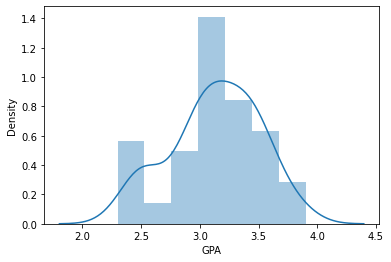

In [43]:
sns.distplot(ss['GPA']);

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


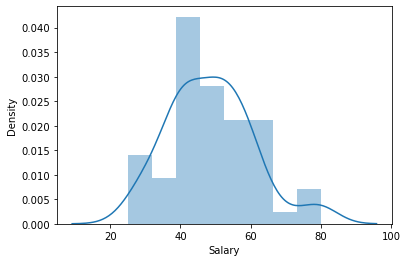

In [44]:
sns.distplot(ss['Salary']);

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


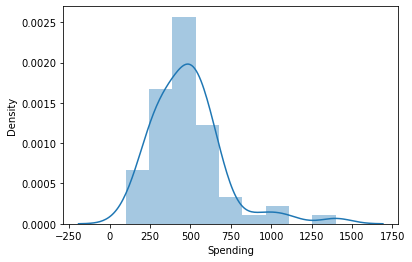

In [45]:
sns.distplot(ss['Spending']);

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


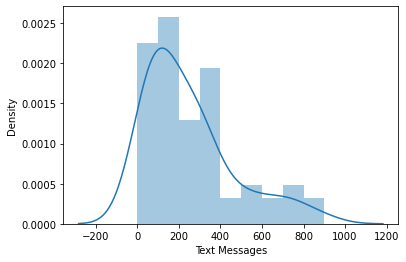

In [46]:
sns.distplot(ss['Text Messages']);

<Figure size 1512x1008 with 0 Axes>

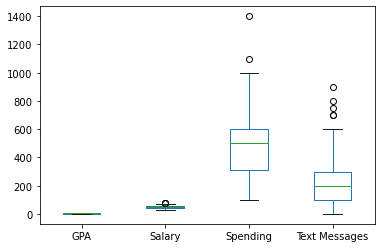

In [47]:
plt.figure(figsize=(21,14))
ss[['GPA','Salary','Spending','Text Messages']].plot(kind = 'box');

#### From the graphs, we can see the data looks normally distributed.

However, to arrive at a given data follow a normal distribution, we have 3 conditions,

a. The Mean, Median and Mode will be equal or almost equal in a real-life scenario. 

b. The Mean will move closer to the Median(50% quartile) in any given distribution. From five-point                summary data as listed above using ‘describe function’, we see for all the 4 parameters, the mean              value is closer to 50% quartile value rather than 25% or 75%. Also the presence of very less or no              outliers in the dataset.This indicates that the given dataset is normally distributed but not                   uniform.                                                          
       c. The normal distribution has mean and standard deviation data. We have the same from the given                   parameters above.
          However this may not be conclusive  they do not reveal precise values. So we do 2 more checks and               those are Skew test and & P-values using Z-score of Normal distribution.                                                       


In [48]:
Skewness = pd.DataFrame({'Skewness':[stats.skew(ss.GPA),stats.skew(ss.Salary),stats.skew(ss.Spending),stats.skew(ss['Text Messages'])]},
                        index=['GPA','Salary','Spending','Text Messages'])
Skewness

,Skewness
GPA,-0.306937
Salary,0.521677
Spending,1.547285
Text Messages,1.264245


##### From Skewtest: 

For normally distributed data, the skewness should be about zero. For unimodal continuous distributions, a skewness value greater than zero means that there is more weight in the right tail of the distribution. The function skewtest can be used to determine if the skewness value is close enough to zero, statistically speaking.

Therefore the skewness test shows GPA and Salary is atleast closer to zero which can be siad normally distributed. However Spending and Text messages are right skewed hence maynot be normally distributed, maybe increase in sample size can reveal more on this whether it is normally distributed.
  

##### Finding p-value using Z-score (68-95-99.7% 1,2,3 std dev rule):

Let's also calculate the probability and find out whether they fall within 65-95-99.7% of confidence levels of 1,2,3 std deviations. If they do, they are normally distributed.

In [49]:
ss_norm_gpa = stats.norm.cdf(62,loc=3.129032, scale=0.377388)
ss_norm_gpa

1.0

In [50]:
ss_norm_sal = stats.norm.cdf(62,loc=48.548387, scale=12.080912)
ss_norm_sal

0.8672445536606301

In [51]:
ss_norm_spend = stats.norm.cdf(62,loc=482.016129, scale=221.953805)
ss_norm_spend

0.029221627858042165

In [52]:
ss_norm_tm = stats.norm.cdf(62,loc=246.209677, scale=214.465950)
ss_norm_tm

0.19519157695971212

#### p-values vs. Confidence level (1,2,3 std deviation rule).

GPA           = 1 > 0.95<0.997 = Falls within 2 Standard deviation = Data is Normally distributed.  

Salary        = 0.87 >0.68<0.95<0.997 = Falls within 1 Standard deviation = Data is Normally distributed. 

Spending      = 0.029<0.68<0.95<0.997 = Falls out of 3 Standard deviation hence NOT Normally distributed. 

Text Messages = 0.195<0.68<0.95<0.997 = Falls out of 3 Standard deviation hence NOT Normally distributed. 

#### Hence from the given data points above from 3 different methods of Graphical representation, Skewtest & P-values using Z-score of Normal distribution, we can say that:

The variables in the dataset GPA, Salary, are Normally distributed.

Whereas Spending and Text Messages may not be normally distributed according to all 3 checks of boxplot (Histogram also shows Spending Text Messages may not be normally distributed as it is skewed),skewtest and     p-values using Z score of Normal distribution.


-------------------------------------------------------------------------  End of Report  -------------------------------------------------------------------------